# Scikit-Learn (sklearn)

- Most popular for classical machine learning (not deep learning)
- Interface for Support Vector Machine, Decision Tree, Random Forest, ...
- Build on top of NumPy and SciPy

Here is the code which loads and splits an example dataset (Iris, very clean dataset) and trains a classical machine learning algorithm (SVC) on it:

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classifier (Support Vector Classifier)
clf = SVC()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```

Comparing this code with the first code snippet in "8_Fastai", we see a lot of similarities. So lets map the concepts we just learned in "8_Fastai" to this code snippet to understand what it is doing.



## 1. Load Data
**sklearn**
```python
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
**fastai**
```python
# Load data
dls = TabularDataLoaders.from_csv('sample_data/titanic.csv',
                                  y_names=['Survived'],
                                  y_block = CategoryBlock,
                                  cat_names=['Pclass', 'Sex', 'Embarked'],
                                  cont_names=['Age', 'Fare', 'SibSp'],
                                  procs=[Categorify, FillMissing, Normalize])
```

Data loading in sklearn is directly done on DataFrames/NumPy arrays (`iris` is a DataFrame and `X`, `y` are NumPy arrays) instead of using a `DataLoaders` class which does the same (+preprocessing) under the hood. The sklearn code does
1. Load the DataFrame
2. Splits the DataFrame into the features X and the target y
3. Splits both DataFrames into train and test arrays

For sklearn, any needed preprocessing (fill missing values, categorify, normalize) has to be done "by hand" on the DataFrames/arrays. We will not go into much detail regarding preprocessing since photonai (our in-house framework build on top of sklearn) handles preprocessing (see 10_Photon).



## 2. Load Model
**sklearn**
```python
clf = SVC()
```
**fastai**
```python
learn = tabular_learner(dls, metrics=[accuracy])
```

In sklearn you choose between classical ML model classes
- Support Vector Classifier `sklearn.svm.SVC` or Regressor `sklearn.svm.SVR`
- Decision Tree Classifier `sklearn.tree.DecisionTreeClassifier` or Regressor `sklearn.tree.DecisionTreeRegressor`
- Random Forest Classifier `sklearn.ensemble.RandomForestClassifier` or Regressor `sklearn.ensemble.RandomForestRegressor`
- Gaussian Process Classifier `sklearn.gaussian_process.GaussianProcessClassifier` or Regressor `sklearn.gaussian_process.GaussianProcessRegressor`
- ...

instead of PyTorch models - i.e. neural network - which are used in fastai.

Each ML model class comes with different hyperparameters (e.g. SVM -> C, gamma; DecisionTree -> max_depth, min_samples_split, ...) which govern the internal settings of the respective model. Changing these hyperparameters to maximize model performance (in the test data) is called **hyperparameter optimization**.

We will not go into the details of how to choose models and hyperparameters. Again we refer to photonai which enables you to easily run experiments across many sklearn models and hyperparameters with proper validation on your data, such that you can simply pick the best performing model/hyperparameter (see 10_Photon).



## 3. Model training
**sklearn**
```python
clf.fit(X_train, y_train)
```
**fastai**
```python
learn.fit_one_cycle(5)
```

In sklearn you directly pass the features `X` and `y` to the `fit` method of the ML model instance you defined.

In contrast to neural network, training duration (e.g. epochs) is not a general hyperparameter for classical ML models.

## 4. Evaluation
**sklearn**
```python
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```
**fastai**
```python
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
```

In sklearn you directly pass the features `X` to the `predict` method of the fitted ML model to get predictions.

By calculating the accuracy of these predictions `y_pred` with respect to the targets `y_test` we can evaluate the model performance of the test data.

**Task:** Copy and paste the whole analysis code and add lines which plot a confusion matrix based on `y_pred` and `y_test`.



Hint: `from sklearn.metrics import confusion_matrix`

Accuracy: 0.9407407407407408


Text(50.722222222222214, 0.5, 'Predicted')

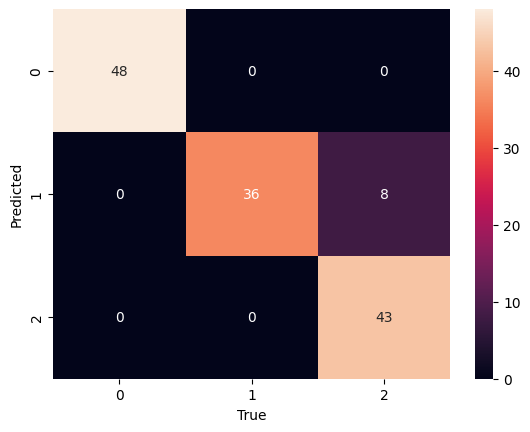

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Choose a classifier (Support Vector Classifier)
clf = SVC()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

## 5. Cross Validation
Cross Validation is an **alternative to splitting** your data in a **training** and a **test** set **once** for validation.

![](https://miro.medium.com/v2/resize:fit:1200/1*AAwIlHM8TpAVe4l2FihNUQ.png)

In 5-fold cross validation the **training and subsequent testing is repeated 5 times** each time using another 20% of the total data for testing.

*Pros*

- **Use all data** for training (and testing)
- More validation -> Overfitting (via manual optimization) less likely

*Cons*

- **Longer runtime** (5-fold CV -> 5x runtime)

So the only cases in which it can be reasonable to rely on a simple train-test split instead of cross validation is if you work with

- large datasets
- limited compute
- models with long training time


 and/or if you are at an early stage of your analysis where you quickly explore if certain models work at all.

 By using `KFold` instead of `train_test_split` you can apply cross validation in your analysis.

 **Task:** Given `X = np.random.random((30, 7))` use [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to generate a list containing 5 numpy arrays which each contain the test indizes of the respective fold. How can you avoid that the test indizes are different each time you rerun the code?

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.random.random((30, 7))
kf = KFold(n_splits=5, shuffle=True, random_state=1)

test_indizes = []
for train_idxs, test_idxs in kf.split(X):
  test_indizes.append(test_idxs)

print(test_indizes)

[array([10, 14, 17, 19, 20, 21]), array([ 3,  4, 22, 23, 24, 26]), array([ 2,  6,  7, 13, 18, 25]), array([ 0,  1, 15, 16, 27, 29]), array([ 5,  8,  9, 11, 12, 28])]



## Exercise
Modify the given analysis code such that a 5-fold cross validation is applied and calculate the mean accuracy across all 5 test sets.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Do cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

y_preds = []
y_tests = []
for train_idxs, test_idxs in kf.split(X):
  clf = SVC()
  clf.fit(X[train_idxs], y[train_idxs])
  y_pred = clf.predict(X[test_idxs])
  y_preds.append(y_pred)
  y_tests.append(y[test_idxs])

# Join all true and predicted y
y_pred = np.concatenate(y_preds)
y_test = np.concatenate(y_tests)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

(150,)
(150,)
Accuracy: 0.9466666666666667
